# Car Accident Road Conditions Dataset Combining

# All Imports

In [2]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Read Vehicles Dataset

In [2]:
# Preview Vehicles dataset
Vehicles = pd.read_csv('Vehicles.csv', low_memory=False)
Casualties = pd.read_csv('Casualties.csv', low_memory=False)
Accidents = pd.read_csv('Accidents.csv', low_memory=False)
print(Vehicles.shape)
Vehicles.head()

(238926, 23)


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,1,9,0,18,0,0,0,0,0,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2,2,0,18,0,0,1,0,0,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009342,2,9,0,18,0,1,1,0,0,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009344,1,9,0,18,0,1,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


# Read Casualties Dataset

In [3]:
print(Casualties.shape)
Casualties.head()

(170993, 16)


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2017010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,2017010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2017010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,2017010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,2017010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


# Read Accidents Dataset

In [4]:
# Preview Accidents dataset
print(Accidents.shape)
Accidents.head()

(129982, 32)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


In [5]:
print(Accidents.columns)
print(Vehicles.columns)
print(Casualties.columns)

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')
Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
   

# Remove Columns in Accidents

In [6]:
A = Accidents.drop(columns=['Location_Easting_OSGR','Location_Northing_OSGR','Longitude', 'Latitude', 'Police_Force','Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number','2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],axis=1)
print(A.shape)
A.head()

(129982, 14)


,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,2017010001708,1,2,3,6,30,0,-1,4,1,1,0,0,1
1,2017010009342,3,2,1,6,30,3,4,4,1,2,0,0,1
2,2017010009344,3,3,1,6,30,3,4,4,1,1,0,0,1
3,2017010009348,3,2,1,1,30,1,4,4,2,2,0,0,1
4,2017010009350,2,1,1,3,20,6,2,4,1,2,0,0,1


# Remove Columns in Vehicles

In [7]:
V = Vehicles.drop(columns=['Vehicle_Manoeuvre','Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver','Age_of_Driver','Engine_Capacity_(CC)', 'Propulsion_Code','Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'])
print(V.shape)
V.head()

(238926, 9)


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Location-Restricted_Lane,Junction_Location,Sex_of_Driver,Age_Band_of_Driver,Age_of_Vehicle
0,2017010001708,1,9,0,0,0,1,5,1
1,2017010001708,2,2,0,0,0,1,4,-1
2,2017010009342,1,9,0,0,1,1,6,8
3,2017010009342,2,9,0,0,1,1,7,12
4,2017010009344,1,9,0,0,1,3,-1,-1


# Remove Columns in Casualties

In [8]:
C = Casualties.drop(columns=['Casualty_Reference','Age_of_Casualty','Pedestrian_Road_Maintenance_Worker','Casualty_Home_Area_Type', 'Casualty_IMD_Decile'])
print(C.shape)
C.head()


(170993, 11)


,Accident_Index,Vehicle_Reference,Casualty_Class,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Casualty_Type
0,2017010001708,1,2,2,4,3,0,0,1,0,9
1,2017010001708,2,1,1,4,2,0,0,0,0,2
2,2017010001708,2,2,1,4,1,0,0,0,0,2
3,2017010009342,1,2,2,6,3,0,0,1,0,9
4,2017010009344,3,1,2,6,3,0,0,0,0,9


# Combine Accidents and Vehicles

**Creates csv for combined Accidents and Vehicles data in 'AV DO NOT EDIT.csv'**

In [9]:
T=pd.DataFrame()
V_length = V.shape[0]
V_pos = 0
for A_pos in range(0,A.shape[0]):
    A_row = A.iloc[A_pos]
    A_ind, V_ind = A_row[0], A_row[0]
    while(V_ind == A_ind):
        V_row = V.iloc[V_pos].drop('Accident_Index')
        V_pos += 1
        if(V_pos==V_length):
            V_ind = 0
        else:
            V_ind = V.iloc[V_pos][0]
        row = pd.concat([A_row,V_row])
        T = T.append(row,ignore_index=True)
T
T.to_csv(r'AV DO NOT EDIT.csv',index=False)

# Combine Accidents, Vehicles, and Casualties - IGNORE

**Combined all 3 datasets, but we ended up deciding not to use the Casualties dataset and only used the AV dataset**

In [10]:
#AVC=pd.DataFrame()
#C_length = C.shape[0]
#C_pos = 0
#for T_pos in range(0,T.shape[0]):
#    T_row = T.iloc[T_pos]
#    C_row = C.iloc[C_pos]
#    T_ind, C_ind = T_row['Accident_Index'], C_row['Accident_Index']
#    T_ref, C_ref = T_row['Vehicle_Reference'], C_row['Vehicle_Reference']
#    while( T_ind == C_ind and T_ref == C_ref):
#        C_row = C_row.drop(['Accident_Index','Vehicle_Reference'])
#        row = pd.concat([T_row,C_row])
#        AVC = AVC.append(row,ignore_index=True)
#        C_pos += 1
#        if(C_pos==C_length):
#            C_ind = 0
#        else:
#            C_row = C.iloc[C_pos]
#            C_ind = C_row['Accident_Index']
#            C_ref = C_row['Vehicle_Reference']
#        
#AVC

# Data Cleaning of AV Starts Here

**Read in AV**

In [11]:
AV = pd.read_csv('AV DO NOT EDIT.csv',low_memory=False)
print(AV.shape)
AV.head()

(238926, 22)


,Accident_Index,Accident_Severity,Age_Band_of_Driver,Age_of_Vehicle,Carriageway_Hazards,Junction_Control,Junction_Detail,Junction_Location,Light_Conditions,Number_of_Casualties,...,Road_Type,Sex_of_Driver,Special_Conditions_at_Site,Speed_limit,Towing_and_Articulation,Urban_or_Rural_Area,Vehicle_Location-Restricted_Lane,Vehicle_Reference,Vehicle_Type,Weather_Conditions
0,2017010001708,1.0,5.0,1.0,0.0,-1.0,0.0,0.0,4.0,3.0,...,6.0,1.0,0.0,30.0,0.0,1.0,0.0,1.0,9.0,1.0
1,2017010001708,1.0,4.0,-1.0,0.0,-1.0,0.0,0.0,4.0,3.0,...,6.0,1.0,0.0,30.0,0.0,1.0,0.0,2.0,2.0,1.0
2,2017010009342,3.0,6.0,8.0,0.0,4.0,3.0,1.0,4.0,1.0,...,6.0,1.0,0.0,30.0,0.0,1.0,0.0,1.0,9.0,1.0
3,2017010009342,3.0,7.0,12.0,0.0,4.0,3.0,1.0,4.0,1.0,...,6.0,1.0,0.0,30.0,0.0,1.0,0.0,2.0,9.0,1.0
4,2017010009344,3.0,-1.0,-1.0,0.0,4.0,3.0,1.0,4.0,1.0,...,6.0,3.0,0.0,30.0,0.0,1.0,0.0,1.0,9.0,1.0


**Remove unnecessary columns and perform listwise deletion for missing values**

In [12]:
count = 0
todrop = []
#AVC3 = AVC.drop(columns = ['Accident_Index','Accident_Severity','Vehicle_Reference','Number_of_Casualties','Number_of_Vehicles','Carriageway_Hazards','Car_Passenger','Bus_or_Coach_Passenger','Special_Conditions_at_Site','Junction_Detail','Junction_Control','Junction_Location','Casualty_Type','Pedestrian_Location','Pedestrian_Movement','Road_Type','Towing_and_Articulation','Vehicle_Location-Restricted_Lane','Vehicle_Type'])
#AV3 = AV.drop(columns = ['Accident_Index','Vehicle_Reference'])
AV3 = AV.drop(columns=['Vehicle_Reference','Number_of_Casualties','Number_of_Vehicles','Vehicle_Location-Restricted_Lane','Junction_Control','Junction_Detail','Junction_Location','Carriageway_Hazards'])
for AV3_pos in range(0,AV3.shape[0]):
    for col_pos in range(0,AV3.shape[1]):
        if( AV3.iat[AV3_pos,col_pos]==-1 ):
            count += 1
            todrop.append(AV3_pos)
            break
AV3 = AV3.drop(todrop).reset_index(drop=True)
print(count)
print(AV3.shape)
AV3.head()

77728
(161198, 14)


,Accident_Index,Accident_Severity,Age_Band_of_Driver,Age_of_Vehicle,Light_Conditions,Road_Surface_Conditions,Road_Type,Sex_of_Driver,Special_Conditions_at_Site,Speed_limit,Towing_and_Articulation,Urban_or_Rural_Area,Vehicle_Type,Weather_Conditions
0,2017010001708,1.0,5.0,1.0,4.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
1,2017010009342,3.0,6.0,8.0,4.0,2.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
2,2017010009342,3.0,7.0,12.0,4.0,2.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
3,2017010009344,3.0,6.0,9.0,4.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
4,2017010009344,3.0,6.0,14.0,4.0,1.0,6.0,2.0,0.0,30.0,0.0,1.0,9.0,1.0


**Band together Age_of_Vehicle into 4 years per band**

In [13]:
age = AV3['Age_of_Vehicle']
for AV3_pos in range(0,AV3.shape[0]):
    if(AV3.at[AV3_pos,'Age_of_Vehicle']<5):
        AV3.at[AV3_pos,'Age_of_Vehicle'] = 1
    elif(AV3.at[AV3_pos,'Age_of_Vehicle']<9):
        AV3.at[AV3_pos,'Age_of_Vehicle'] = 2
    elif(AV3.at[AV3_pos,'Age_of_Vehicle']<13):
        AV3.at[AV3_pos,'Age_of_Vehicle'] = 3
    elif(AV3.at[AV3_pos,'Age_of_Vehicle']<17):
        AV3.at[AV3_pos,'Age_of_Vehicle'] = 4
    elif(AV3.at[AV3_pos,'Age_of_Vehicle']<21):
        AV3.at[AV3_pos,'Age_of_Vehicle'] = 5
    elif(AV3.at[AV3_pos,'Age_of_Vehicle']<25):
        AV3.at[AV3_pos,'Age_of_Vehicle'] = 6
    else:
        AV3.at[AV3_pos,'Age_of_Vehicle'] = 7
AV3.head()

,Accident_Index,Accident_Severity,Age_Band_of_Driver,Age_of_Vehicle,Light_Conditions,Road_Surface_Conditions,Road_Type,Sex_of_Driver,Special_Conditions_at_Site,Speed_limit,Towing_and_Articulation,Urban_or_Rural_Area,Vehicle_Type,Weather_Conditions
0,2017010001708,1.0,5.0,1.0,4.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
1,2017010009342,3.0,6.0,2.0,4.0,2.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
2,2017010009342,3.0,7.0,3.0,4.0,2.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
3,2017010009344,3.0,6.0,3.0,4.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
4,2017010009344,3.0,6.0,4.0,4.0,1.0,6.0,2.0,0.0,30.0,0.0,1.0,9.0,1.0


In [14]:
AV3.columns

Index(['Accident_Index', 'Accident_Severity', 'Age_Band_of_Driver',
       'Age_of_Vehicle', 'Light_Conditions', 'Road_Surface_Conditions',
       'Road_Type', 'Sex_of_Driver', 'Special_Conditions_at_Site',
       'Speed_limit', 'Towing_and_Articulation', 'Urban_or_Rural_Area',
       'Vehicle_Type', 'Weather_Conditions'],
      dtype='object')

In [15]:
print(AV3.shape)
AV3.head()

(161198, 14)


,Accident_Index,Accident_Severity,Age_Band_of_Driver,Age_of_Vehicle,Light_Conditions,Road_Surface_Conditions,Road_Type,Sex_of_Driver,Special_Conditions_at_Site,Speed_limit,Towing_and_Articulation,Urban_or_Rural_Area,Vehicle_Type,Weather_Conditions
0,2017010001708,1.0,5.0,1.0,4.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
1,2017010009342,3.0,6.0,2.0,4.0,2.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
2,2017010009342,3.0,7.0,3.0,4.0,2.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
3,2017010009344,3.0,6.0,3.0,4.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
4,2017010009344,3.0,6.0,4.0,4.0,1.0,6.0,2.0,0.0,30.0,0.0,1.0,9.0,1.0


**Shows count of each Accident_Severity**

In [16]:
acc_sev = AV3['Accident_Severity']
count1 = 0
count2 = 0
count3 = 0
other = 0
for acc_sev_pos in range(0,acc_sev.shape[0]):
    if(acc_sev[acc_sev_pos]==3):
        count3 += 1
    elif(acc_sev[acc_sev_pos]==2):
        count2 += 1
    elif(acc_sev[acc_sev_pos]==1):
        count1 += 1
    else:
        other += 1
print(count3,count2,count1,other)

132466 26490 2242 0


**Sorts AV into separate DataFrames containing each Accident_Severity**

In [17]:
Ones = pd.DataFrame()
Twos = pd.DataFrame()
Threes = pd.DataFrame()
for AV3_pos in range(0,AV3.shape[0]):
    if(AV3.at[AV3_pos,'Accident_Severity']==3):
        Threes = Threes.append(AV3.iloc[AV3_pos],ignore_index=True)
    elif(AV3.at[AV3_pos,'Accident_Severity']==2):
        Twos = Twos.append(AV3.iloc[AV3_pos],ignore_index=True)
    else:
        Ones = Ones.append(AV3.iloc[AV3_pos],ignore_index=True)
print(Threes.shape)
print(Twos.shape)
print(Ones.shape)

(132466, 14)
(26490, 14)
(2242, 14)


**Change all Accident_Severity 2s to 3s**

In [18]:
for Two_pos in range(0,Twos.shape[0]):
    Twos.at[Two_pos,'Accident_Severity'] = 3
Threes = Threes.append(Twos,ignore_index=True)
print(Ones.shape)
print(Threes.shape)

(2242, 14)
(158956, 14)


**Create DataFrame for testing by including all 1s and undersampling 3s**

In [19]:
UNDER_SAMPLED_AV = pd.DataFrame()
UNDER_SAMPLED_AV = UNDER_SAMPLED_AV.append(Ones,ignore_index=True)
threes_sample = Threes.sample(Ones.shape[0])
print(threes_sample.shape)
UNDER_SAMPLED_AV = UNDER_SAMPLED_AV.append(threes_sample,ignore_index=True)
print(UNDER_SAMPLED_AV.shape)
UNDER_SAMPLED_AV.head(10)

(2242, 14)
(4484, 14)


,Accident_Index,Accident_Severity,Age_Band_of_Driver,Age_of_Vehicle,Light_Conditions,Road_Surface_Conditions,Road_Type,Sex_of_Driver,Special_Conditions_at_Site,Speed_limit,Towing_and_Articulation,Urban_or_Rural_Area,Vehicle_Type,Weather_Conditions
0,2017010001708,1.0,5.0,1.0,4.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
1,2017010010057,1.0,7.0,1.0,1.0,4.0,6.0,1.0,0.0,30.0,0.0,1.0,20.0,1.0
2,2017010010057,1.0,8.0,2.0,1.0,4.0,6.0,1.0,0.0,30.0,0.0,1.0,3.0,1.0
3,2017010010704,1.0,10.0,3.0,4.0,1.0,3.0,1.0,0.0,40.0,0.0,1.0,19.0,1.0
4,2017010010704,1.0,8.0,4.0,4.0,1.0,3.0,1.0,0.0,40.0,0.0,1.0,5.0,1.0
5,2017010010722,1.0,9.0,5.0,1.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,4.0,1.0
6,2017010010722,1.0,11.0,1.0,1.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,1.0
7,2017010010819,1.0,6.0,1.0,1.0,1.0,6.0,1.0,3.0,30.0,0.0,1.0,21.0,1.0
8,2017010010846,1.0,5.0,2.0,1.0,1.0,6.0,1.0,0.0,30.0,0.0,1.0,5.0,1.0
9,2017010011343,1.0,5.0,5.0,4.0,2.0,6.0,1.0,0.0,30.0,0.0,1.0,9.0,3.0


**Drop Accident_Index and Export to CSV**

In [20]:
UNDER_SAMPLED_AV = UNDER_SAMPLED_AV.drop(columns=['Accident_Index'])
UNDER_SAMPLED_AV.to_csv(r'Undersampled Dataset AV.csv',index=False)

<BarContainer object of 2 artists>

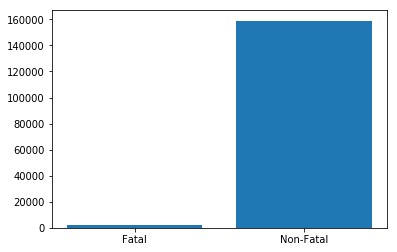

In [6]:
x = ['Fatal','Non-Fatal']
y = [2242,158956]
plt.bar(x,y)